# 환경 세팅 및 데이터셋 업로드

In [1]:
#코랩 환경 준비 및 ultralytics 설치
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12

In [2]:
# 로보플로에서 api 활용한 데이터셋 다운로드(YOLOv8 포맷)
from roboflow import Roboflow

rf = Roboflow(api_key="bGEamJdSzr5rBrg9Sjne")
project = rf.workspace("kiosk-nmotv").project("osp-bao99")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to OSP-1 in yolov8:: 100%|██████████| 452/452 [00:00<00:00, 3950.33it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# YOLOv8 모델 학습시키기

In [3]:
# -------yolov8 학습 코드--------
from ultralytics import YOLO

# 데이터셋 yaml 경로 확인 (Roboflow에서 다운로드된 경로)
data_yaml = dataset.location + "/data.yaml"

# 원하는 모델 선택 (yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt)
model = YOLO('yolov8s.pt') # 해보고 과적합되면 yolov8n.pt로 시도해보기

# 학습 시작
results = model.train(
    data=data_yaml,     # 데이터셋 yaml 파일 경로
    epochs=30,          # 에폭 수 (적절히 조절) -> 3배수씩 늘려보기
    imgsz=640,          # 입력 이미지 크기
    batch=16,           # 배치 크기 (GPU 메모리에 따라 조절)
    name='yolov8s_custom', # 결과 저장 폴더명
    exist_ok=True
)

val_results = model.val(
    data = data_yaml,
    split = 'test',
    plots = True,
    save_json = True,
    exist_ok=True
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 188MB/s]


Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/OSP-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

100%|██████████| 755k/755k [00:00<00:00, 77.4MB/s]

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 21                  -1  1   1969152  ultralytics.nn.modules.block.C2f             [768, 512, 1]                 
 22        [15, 18, 21]  1   2118757  ultralytics.nn.modules.head.Detect           [7, [128, 256, 512]]          
Model summary: 129 layers, 11,138,309 parameters, 11,138,293 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 74.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1235.5±510.0 MB/s, size: 77.7 KB)


train: Scanning /content/OSP-1/train/labels... 195 images, 3 backgrounds, 0 corrupt: 100%|██████████| 195/195 [00:00<00:00, 2420.84it/s]

train: New cache created: /content/OSP-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 611.5±388.5 MB/s, size: 40.2 KB)


val: Scanning /content/OSP-1/valid/labels... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 38229.33it/s]

val: New cache created: /content/OSP-1/valid/labels.cache


Plotting labels to runs/detect/yolov8s_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_custom
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.68G      1.564      13.66      1.402          7        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all         14         14      0.427      0.111      0.111     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.72G      1.213      3.751      1.177          3        640: 100%|██████████| 13/13 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         14         14      0.944      0.111      0.165      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.77G      1.104      2.635      1.135          3        640: 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         14         14      0.983      0.111      0.165      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.79G      1.074      2.123      1.082          2        640: 100%|██████████| 13/13 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         14         14      0.575      0.389      0.407      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.84G      1.054      1.894      1.073          3        640: 100%|██████████| 13/13 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         14         14      0.708      0.389      0.442      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.88G      1.035      1.503      1.067          7        640: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         14         14      0.376      0.611      0.526      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.92G      1.007        1.3      1.042          2        640: 100%|██████████| 13/13 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         14         14       0.63      0.528      0.528      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.95G      1.002      1.304      1.066          5        640: 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         14         14      0.827      0.307      0.522      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.97G      1.027      1.272       1.07          7        640: 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         14         14      0.652      0.515      0.504      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.02G      0.928      1.182      1.001          2        640: 100%|██████████| 13/13 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         14         14      0.621      0.278      0.317      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.06G      1.008      1.187      1.065          7        640: 100%|██████████| 13/13 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         14         14      0.458      0.688      0.563      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       4.1G     0.9137     0.9574      1.028          6        640: 100%|██████████| 13/13 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         14         14      0.701      0.635      0.613      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.15G     0.9323      1.005      1.036          6        640: 100%|██████████| 13/13 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]


                   all         14         14      0.676       0.61      0.652      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.24G      0.908     0.8814     0.9959          4        640: 100%|██████████| 13/13 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         14         14      0.775      0.556      0.591      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       4.3G     0.8975     0.9407      1.005          4        640: 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         14         14      0.658      0.608      0.664      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.38G     0.8673     0.8256      1.009          5        640: 100%|██████████| 13/13 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         14         14      0.876      0.607      0.727      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       4.4G     0.8592     0.7975     0.9957          3        640: 100%|██████████| 13/13 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]


                   all         14         14       0.63      0.722      0.786      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.51G     0.8693     0.7428      1.008          5        640: 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


                   all         14         14       0.71      0.556       0.75      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.55G     0.8858     0.7249     0.9882          7        640: 100%|██████████| 13/13 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         14         14      0.913       0.55       0.78      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.62G     0.8609      0.683     0.9713          3        640: 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         14         14      0.324      0.753      0.586      0.399
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.74G     0.9054     0.7432      1.017          3        640: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         14         14       0.48      0.823      0.711      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.79G     0.8002     0.6361     0.9887          3        640: 100%|██████████| 13/13 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         14         14      0.653      0.688      0.739       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.83G     0.8662      0.698      1.054          3        640: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         14         14      0.625      0.722      0.801      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.87G     0.7768     0.6049      1.016          3        640: 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         14         14      0.696      0.722      0.775      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.92G     0.7991     0.5749     0.9751          3        640: 100%|██████████| 13/13 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         14         14      0.846      0.732      0.836      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.04G      0.735     0.5573     0.9749          3        640: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         14         14      0.894      0.813      0.867      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.07G     0.7154     0.5503     0.9642          2        640: 100%|██████████| 13/13 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         14         14      0.879      0.856      0.866      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.14G     0.7165     0.5618     0.9372          2        640: 100%|██████████| 13/13 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         14         14      0.883      0.819      0.866      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.17G     0.6977      0.525     0.9372          3        640: 100%|██████████| 13/13 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         14         14       0.89      0.813      0.868      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.28G     0.6941     0.5098     0.9393          3        640: 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         14         14      0.884      0.814      0.869      0.645



30 epochs completed in 0.039 hours.
Optimizer stripped from runs/detect/yolov8s_custom/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8s_custom/weights/best.pt, 22.5MB

Validating runs/detect/yolov8s_custom/weights/best.pt...
Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]


                   all         14         14      0.884      0.815      0.869      0.645
                  next          1          1      0.956          1      0.995      0.597
        option_confirm          3          3      0.795          1      0.995      0.901
                   pay          3          3      0.831      0.667      0.674      0.574
        payment_method          3          3          1      0.721      0.995      0.796
               receipt          2          2      0.896          1      0.995        0.7
                 start          2          2      0.825        0.5      0.557        0.3
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/yolov8s_custom
Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 687.6±237.9 MB/s, size: 47.1 KB)


val: Scanning /content/OSP-1/test/labels... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<00:00, 4395.71it/s]

val: New cache created: /content/OSP-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


                   all         11         11      0.639      0.622      0.778      0.511
                  next          1          1      0.578          1      0.995      0.497
        option_confirm          1          1      0.631          1      0.995      0.597
                   pay          4          4      0.514        0.5      0.513      0.372
        payment_method          1          1          1          0      0.995      0.796
               receipt          2          2      0.535        0.5      0.507      0.355
                 start          2          2      0.577      0.731      0.663      0.449
Speed: 0.2ms preprocess, 21.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Saving runs/detect/yolov8s_custom/predictions.json...
Results saved to runs/detect/yolov8s_custom


# 추론 테스트 코드


image 1/1 /content/OSP-1/test/images/-_01_jpg.rf.aa0967f50f4d5b7538c080bf916473eb.jpg: 640x640 (no detections), 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


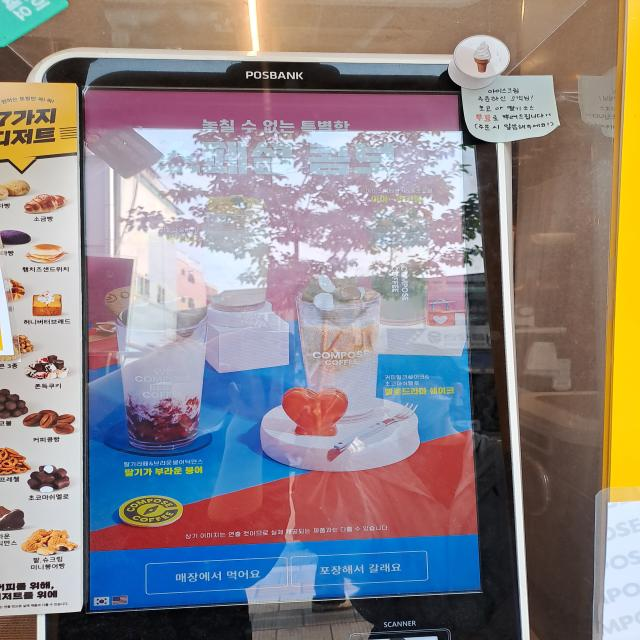


image 1/1 /content/OSP-1/test/images/-_01_jpg.rf.848030d8998c6ac449b00aad21f0f158.jpg: 640x640 (no detections), 16.8ms
Speed: 2.8ms preprocess, 16.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


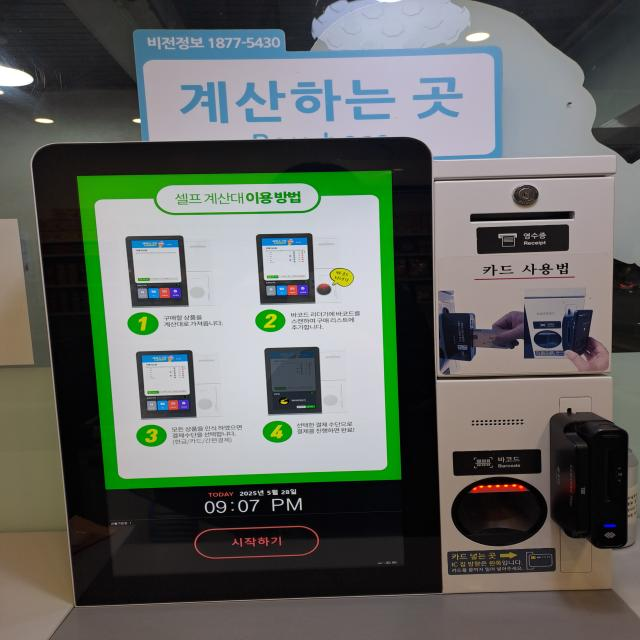


image 1/1 /content/OSP-1/test/images/-_02_jpg.rf.6af87014478096a56b679cf282272590.jpg: 640x640 1 receipt, 17.7ms
Speed: 2.7ms preprocess, 17.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


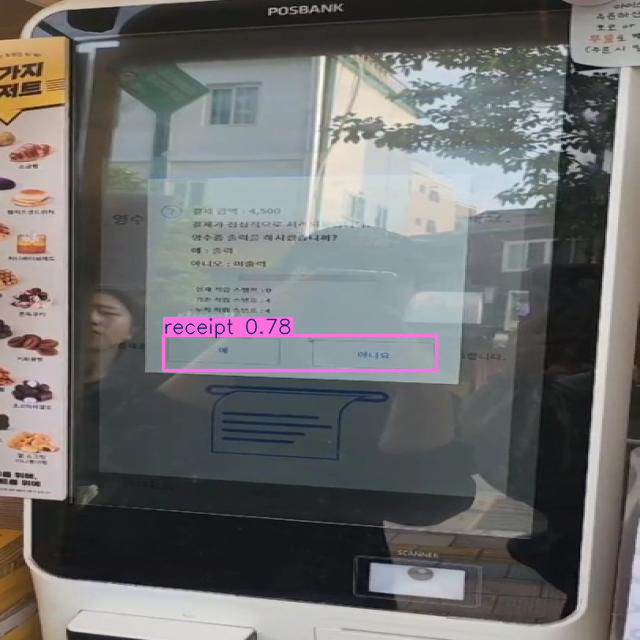


image 1/1 /content/OSP-1/test/images/-_01_jpg.rf.9755a4d34a26fd49c7db3c8973799f1a.jpg: 640x640 1 start, 16.3ms
Speed: 2.3ms preprocess, 16.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


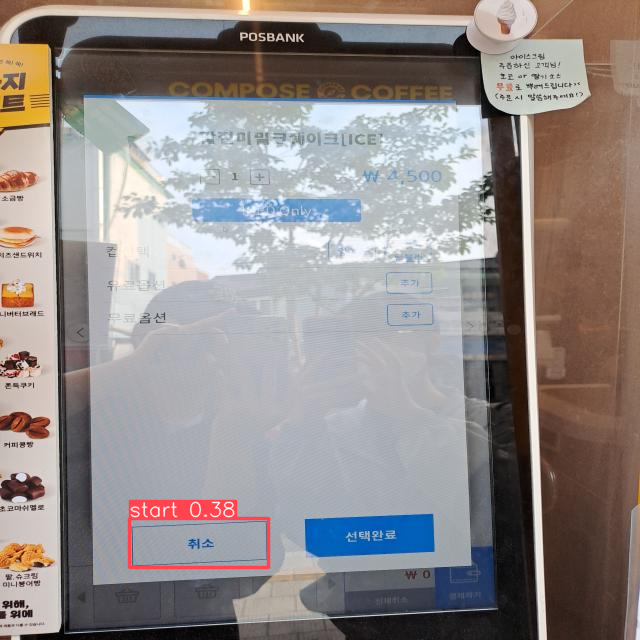


image 1/1 /content/OSP-1/test/images/-_01_jpg.rf.24a65e4c2a3a4ac54a7ebbd0ac1d5755.jpg: 640x640 1 pay, 16.3ms
Speed: 2.9ms preprocess, 16.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


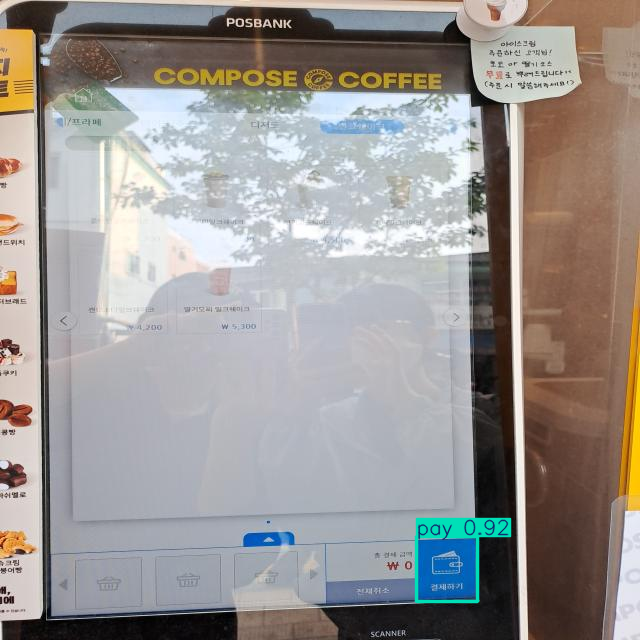


image 1/1 /content/OSP-1/test/images/-_01_jpg.rf.7bfeec7cc1e7892bbfe978e378e00685.jpg: 640x640 1 next, 16.4ms
Speed: 2.4ms preprocess, 16.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


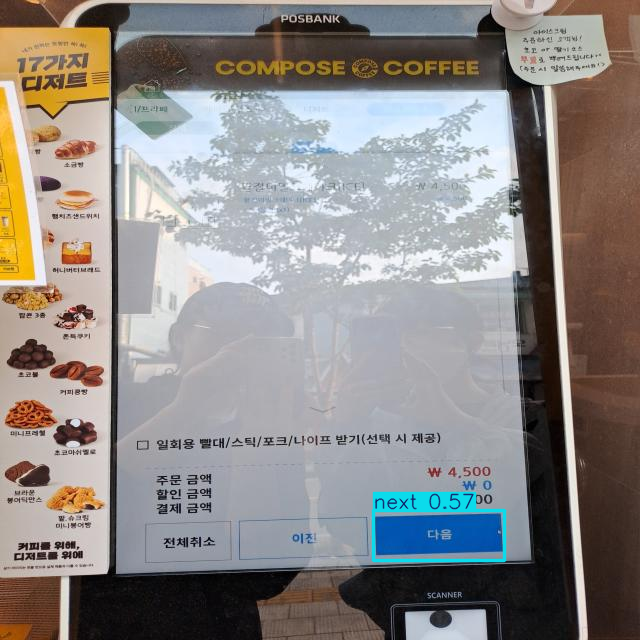


image 1/1 /content/OSP-1/test/images/-_02_jpg.rf.a811a0328387dcdd933bca3f75622792.jpg: 640x640 1 pay, 16.4ms
Speed: 2.5ms preprocess, 16.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


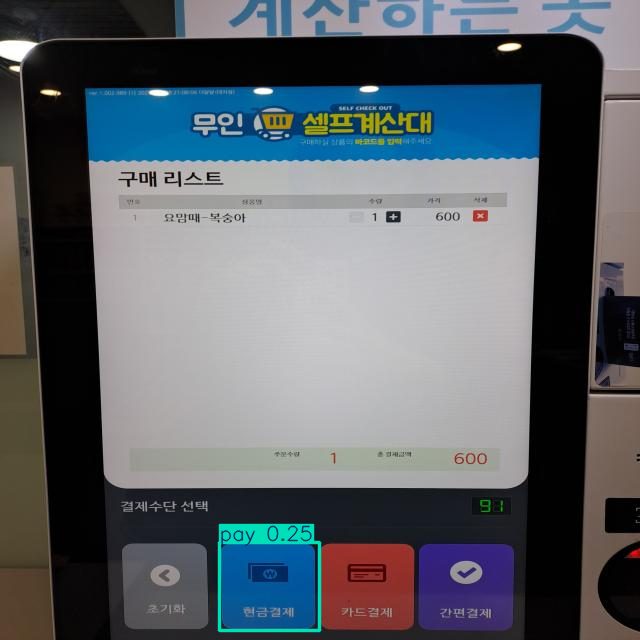


image 1/1 /content/OSP-1/test/images/-_01_jpg.rf.40ea5233da1ef1013f59e629ea74b0d9.jpg: 640x640 (no detections), 16.3ms
Speed: 2.6ms preprocess, 16.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


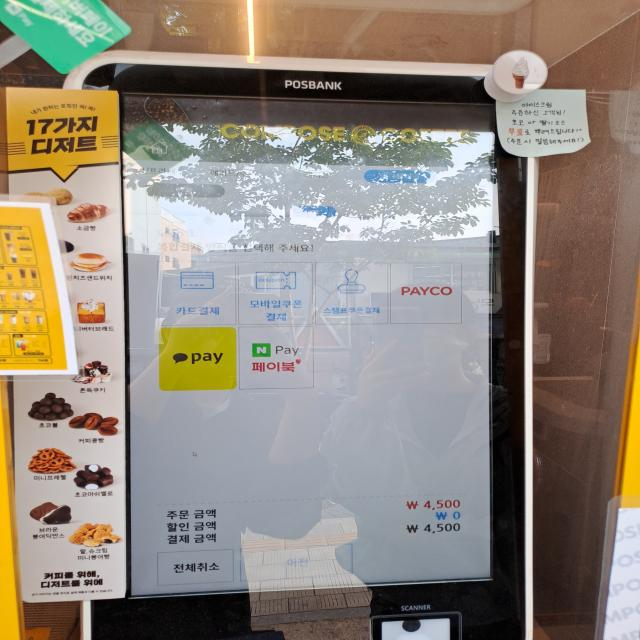


image 1/1 /content/OSP-1/test/images/-_02_jpg.rf.91554f0b1f5ed3053e9387c78c9560fb.jpg: 640x640 1 pay, 16.4ms
Speed: 2.5ms preprocess, 16.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


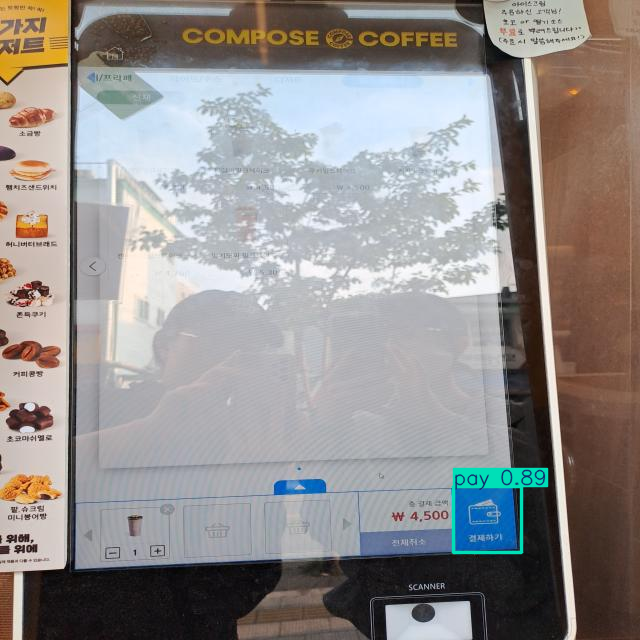


image 1/1 /content/OSP-1/test/images/-_01_jpg.rf.a8bee028cdae04af6456f9d977ba4bab.jpg: 640x640 1 pay, 16.4ms
Speed: 2.7ms preprocess, 16.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


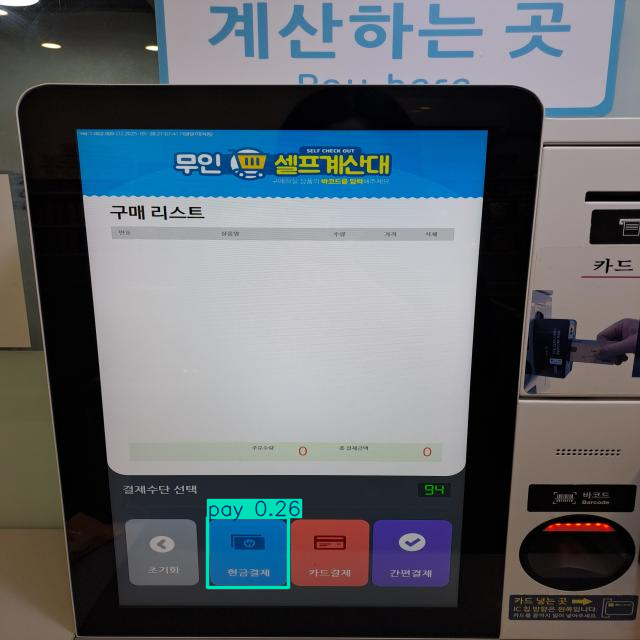


image 1/1 /content/OSP-1/test/images/-_01_jpg.rf.d77b273a437cc6b47d24f32cf9033eba.jpg: 640x640 (no detections), 16.4ms
Speed: 3.0ms preprocess, 16.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


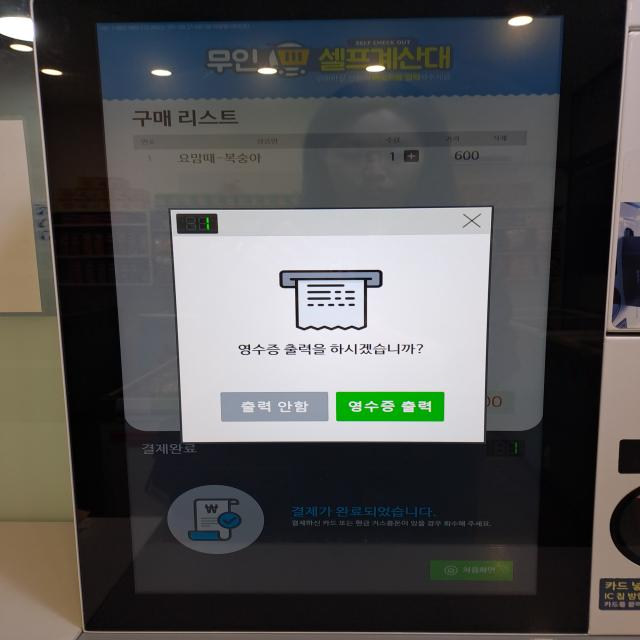

In [4]:
# 학습된 모델 로드
model = YOLO('/content/runs/detect/yolov8s_custom/weights/best.pt')

# 이미지 추론
import glob

# test 이미지 폴더 경로
test_img_dir = '/content/OSP-1/test/images/'

# 모든 이미지 파일 리스트 얻기 (jpg, png 등)
img_list = glob.glob(test_img_dir + '*.*')

for img_path in img_list:
    results = model(img_path)
    results[0].show()  # 바운딩박스, 클래스명 표시

# **학습 성능 시각화 코드**

가장 최근에 학습된 모델의 results.csv(학습결과) 자동으로 불러옴

In [5]:
import os
import glob
import pandas as pd

# 1. yolov8s_custom* 폴더 중 최신 폴더 찾기
base_dir = 'runs/detect'
pattern = os.path.join(base_dir, 'yolov8s_custom*')
folders = glob.glob(pattern)

if not folders:
    raise FileNotFoundError("No yolov8s_custom* folders found in runs/detect/")
else:
    # 수정: 폴더 생성(수정) 시간 기준으로 최신 폴더 선택
    folders.sort(key=lambda x: os.path.getmtime(x))
    latest_folder = folders[-1]

# 2. 최신 폴더의 results.csv 경로
results_csv_path = os.path.join(latest_folder, 'results.csv')
if not os.path.exists(results_csv_path):
    raise FileNotFoundError(f"results.csv not found in {latest_folder}")

Box Loss 그래프: 학습/검증 박스 손실 추이

Precision-Recall 그래프: 정밀도와 재현율 변화
  (재현율 : 실제 정답 객체 중 모델이 정답으로 검출한 객체 수 -> 그냥 정확도로 생각해도 될듯)

mAP 그래프: 0.5 IoU, 0.5-0.95 IoU 기준 mAP 변화
  (정확도,재현율의 관계 평가 -> mAP값이 높으면 객체 탐지율이 높은 것)

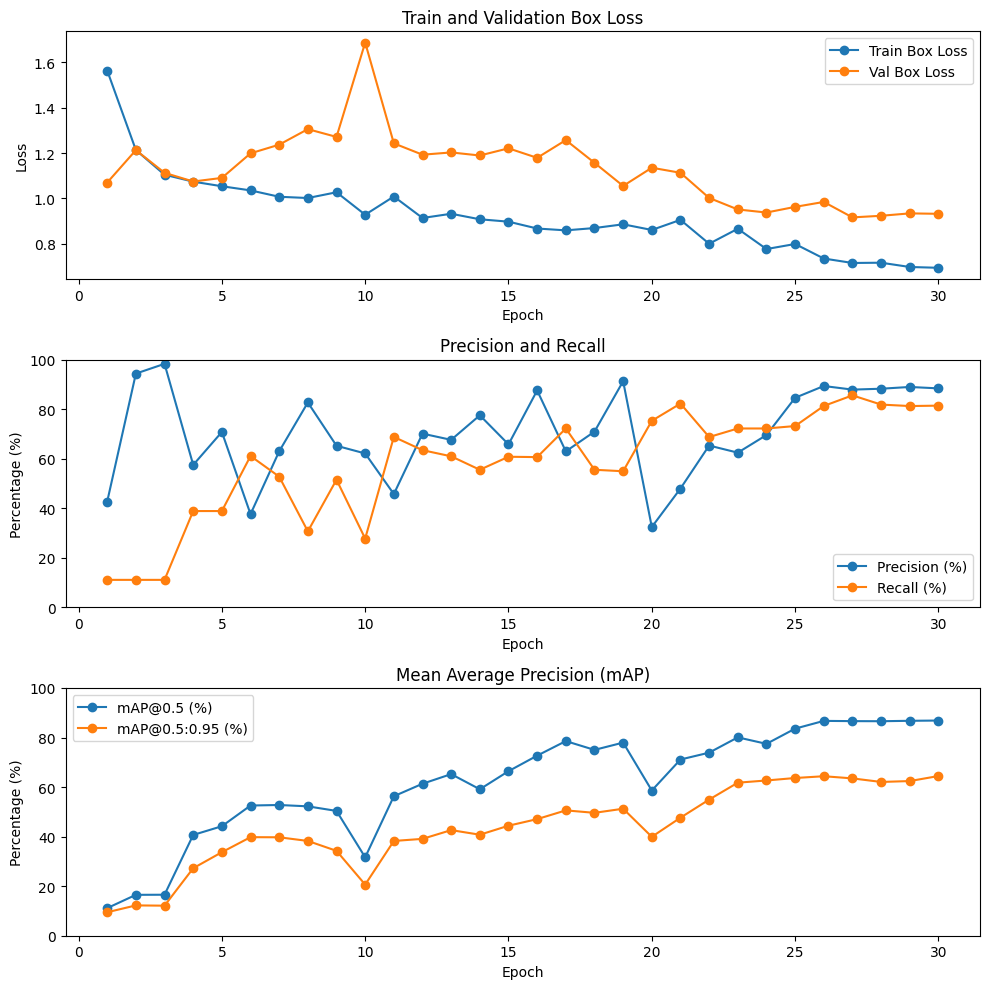

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(results_csv_path) # 위에서 구한 결과 csv 파일 경로 불러옴

plt.figure(figsize=(10, 10))

# 1. Train/Val Box Loss
plt.subplot(3, 1, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', marker='o')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', marker='o')
plt.title('Train and Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 2. Precision and Recall (0~100%)
plt.subplot(3, 1, 2)
plt.plot(df['epoch'], df['metrics/precision(B)']*100, label='Precision (%)', marker='o')
plt.plot(df['epoch'], df['metrics/recall(B)']*100, label='Recall (%)', marker='o')
plt.title('Precision and Recall')
plt.xlabel('Epoch')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # y축을 0~100으로 고정
plt.legend()

# 3. mAP@0.5 and mAP@0.5:0.95 (0~100%)
plt.subplot(3, 1, 3)
plt.plot(df['epoch'], df['metrics/mAP50(B)']*100, label='mAP@0.5 (%)', marker='o')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)']*100, label='mAP@0.5:0.95 (%)', marker='o')
plt.title('Mean Average Precision (mAP)')
plt.xlabel('Epoch')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # y축을 0~100으로 고정
plt.legend()

plt.tight_layout()
plt.show()


모델 성능 수치화해서 출력
-> 이거를 깃헙에 올릴 때 커밋 메시지에 포함해 주세요!
예) 모델 성능 : Epoch 150, batch 16 => mAP@0.5=82.1%, mAP@0.5:0.95=63.4%, Precision=87.2%, Recall=71.5%

In [8]:
from ultralytics import YOLO

# 학습된 모델 로드
model = YOLO('runs/detect/yolov8s_custom/weights/best.pt')

# test셋에서 평가
metrics = val_results

# 주요 성능 지표 명시적으로 출력
print(f"mAP@0.5: {metrics.box.map50*100:.2f}%")
print(f"mAP@0.5:0.95: {metrics.box.map*100:.2f}%")
print(f"Precision: {metrics.box.mp*100:.2f}%")
print(f"Recall: {metrics.box.mr*100:.2f}%")


mAP@0.5: 77.80%
mAP@0.5:0.95: 51.12%
Precision: 63.92%
Recall: 62.19%


#특이사항 및 추가 팁
-초반 진동은 데이터셋이 270장으로 작기 때문에 일반적입니다.

-더 많은 데이터가 있다면 진동이 더 줄고, 성능이 더 올라갈 수 있습니다.

-성능 개선 여지:

데이터셋 다양화/증강 추가

하이퍼파라미터(learning rate, batch size 등) 튜닝

모델 크기(small ↔ medium) 조정 실험